# Felhantering

> Errors should never pass silently. Unless explicitly silenced.

Tim Peters, *The Zen of Python*

## Syntaxfel och *exceptions*

### Syntaxfel

Fel som uppstår när koden är skriven på ett sätt som Python-tolkaren inte kan tolka.


In [ ]:
print('this string is unterminated)

In [ ]:
for i in ['forgot', 'the', ':']
    print('so this is a syntax error')

### *Exceptions*

Fel som uppstår när koden är korrekt rent syntaxmässigt, men ändå inte kan exekveras.

#### `NameError`

In [ ]:
print(undefined_variable)  # pyright: ignore[reportUndefinedVariable]

#### `AttributeError`

In [ ]:
a = 42
a.upper()  # pyright: ignore[reportAttributeAccessIssue]

#### `ValueError`

In [ ]:
int('fifty three')

In [ ]:
int("53")

#### `TypeError`

In [ ]:
1 + '2'  # pyright: ignore[reportOperatorIssue]

In [ ]:
1 + int('2')  # pyright: ignore[reportOperatorIssue]

#### `IndexError`

In [ ]:
[2, 4, 6][4]

`builtins` har alla inbyggda *exceptions*.

In [ ]:
[err for err in __builtins__.__dict__.keys() if 'Error' in err]

## `try ... except ... else`

### LBYL vs. EAFP

#### **LBYL**: *Look Before You Leap*
Försöker förutspå vad som kan gå fel och bygger logiska system med många `if ... else`-satser.

#### **EAFP**: *Easier to Ask for Forgiveness than Permission*
Förutsätter att allt är som det ska och hanterar *exceptions* med `try ... except` när de uppstår.

In [ ]:
a = 42
b = '23'

print(a + b)  # pyright: ignore[reportOperatorIssue]

print('This is also important!')

Vi kan tysta *exceptions* med `pass`.

In [ ]:
a = 42
b = '23'

try:
    print(a + b)  # pyright: ignore[reportOperatorIssue]
except:
    pass  # Explicitly silenced

print('This is also important!')

Det viktiga är att vi vet vad vi håller på med. Oftast kommer en tystad *exception* tillbaka och biter oss senare.

In [82]:
a = 42
b = '23'

try:
    s = a + b  # pyright: ignore[reportOperatorIssue]
except:
    pass  # Explicitly silenced

In [ ]:
print(s)  # Variable is never defined

In [ ]:
a = 42
b = '23'

try:
    s = a + b  # pyright: ignore[reportOperatorIssue]
except:
    print('An exception occured!')
else:
    print(s)
finally:
    print('Hope it went well but this is executed either way.')

# Other code

In [ ]:
a = 42
b = 23

try:
    s = a + b  # pyright: ignore[reportOperatorIssue]
except:
    print('An exception occured!')
else:
    print(s)
finally:
    print('Hope it went well but this is executed either way.')

# Other code

In [ ]:
a = 42
b = '23'

try:
    print(a + b)  # pyright: ignore[reportOperatorIssue]
except TypeError:
    print(int(a) + int(b))
except ValueError:
    pass

In [ ]:
a = 42
b = 'tjugotre'

try:
    print(a + b)  # pyright: ignore[reportOperatorIssue]
except TypeError:
    print(int(a) + int(b))

In [ ]:
a = 42
b = 'tjugotre'

try:
    print(a + b)  # pyright: ignore[reportOperatorIssue]
except TypeError:
    try:
        print(int(a) + int(b))
    except ValueError as e:
        print(e)
        print('How do we handle this situation?')

## Lyfta *exceptions* med `raise`

Vi kan använda `isinstance` för att kolla om objektet vi hanterar är av en viss datatyp.

In [ ]:
a = 42
if not isinstance(a, str):
    raise TypeError(f'Object must be of type str but is of type {type(a)}')
else:
    print(a.upper())

Eller motsvarande om man inte vill använda `not`:

In [96]:
a = 42
if isinstance(a, str):
    print(a.upper())
else:
    raise TypeError('Object must be of type str')

TypeError: Object must be of type str

In [97]:
a = 'forty-two'
if not isinstance(a, str):
    raise TypeError('Object must be of type str')
else:
    print(a.upper())

FORTY-TWO


`hasattr` returnerar `True` om ett attribut finns på ett visst objekt. Vi ändrar typen av *exception* jämfört med exemplena ovan.

In [98]:
a = 'forty-two'
if not hasattr(a, 'upper'):
    raise AttributeError("Object must have attribute 'upper'")
else:
    print(a.upper())

FORTY-TWO


In [99]:
b = 42
if not hasattr(b, 'upper'):
    raise AttributeError("Object must have attribute 'upper'")
else:
    print(a.upper())

AttributeError: Object must have attribute 'upper'

### Datatvätt med LBYL & EAFP



Vi läser in ett dataset av lite sämre kvalitet.^[Jag kan ha råkat ha sönder lite data från SMHI. 🤷] Det är en lista av dictionaries med nycklarna `date` och `temp`.

`date`-värdena beskriver datum i två olika format.

En del `temp`-värden är  `None`, och dessutom är det blandat mellan `.` och `,` som decimalavgränsare.

Vi ska här nedan se på två sätt att tvätta datan för att på sikt kunna göra ett linjediagram över temperaturerna.

In [100]:
import json
import pandas as pd

temps = json.load(open('data/temps.json'))
temps

[{'date': '04/25/24', 'temp': '8.3'},
 {'date': '2024-04-26', 'temp': '8.1'},
 {'date': '2024-04-27', 'temp': '11.8'},
 {'date': '2024-04-28', 'temp': '17.6'},
 {'date': '04/29/24', 'temp': None},
 {'date': '2024-04-30', 'temp': '17,9'},
 {'date': '05/01/24', 'temp': '17.8'},
 {'date': '05/02/24', 'temp': '17.7'},
 {'date': '05/03/24', 'temp': '17.6'},
 {'date': '2024-05-04', 'temp': '16.1'},
 {'date': '05/05/24', 'temp': '16.9'},
 {'date': '2024-05-06', 'temp': '13.5'},
 {'date': '05/07/24', 'temp': '11,8'},
 {'date': '2024-05-08', 'temp': '14.3'},
 {'date': '2024-05-09', 'temp': None},
 {'date': '2024-05-10', 'temp': '13.2'},
 {'date': '2024-05-11', 'temp': '13.8'},
 {'date': '2024-05-12', 'temp': None},
 {'date': '05/13/24', 'temp': '17,3'},
 {'date': '05/14/24', 'temp': '19.9'},
 {'date': '2024-05-15', 'temp': '20.4'},
 {'date': '2024-05-16', 'temp': None},
 {'date': '2024-05-17', 'temp': None},
 {'date': '05/18/24', 'temp': '21.4'},
 {'date': '05/19/24', 'temp': '21.4'},
 {'date':

#### `date`

In [101]:
'2024-09-04'.split('-')

['2024', '09', '04']

In [102]:
# Eftersom vi vet att det är två olika format lämpar sig LBYL bättre

import datetime

for row in temps:
    if '-' in row['date']:  # Format YYYY-MM-DD
        y, m, d = [int(x) for x in row['date'].split('-')]
        new_date = datetime.date(y, m, d)
    elif '/' in row['date']:  # Format MM/DD/YY
        m, d, y = [int(x) for x in row['date'].split('/')]
        new_date = datetime.date(2000 + y, m, d)  # Lägg till 2000 till året för att få 2024
    else:
        raise Exception(f'Could not parse date {row["date"]}')  # Fånga eventuella undantag
    row['date'] = new_date

In [103]:
temps

[{'date': datetime.date(2024, 4, 25), 'temp': '8.3'},
 {'date': datetime.date(2024, 4, 26), 'temp': '8.1'},
 {'date': datetime.date(2024, 4, 27), 'temp': '11.8'},
 {'date': datetime.date(2024, 4, 28), 'temp': '17.6'},
 {'date': datetime.date(2024, 4, 29), 'temp': None},
 {'date': datetime.date(2024, 4, 30), 'temp': '17,9'},
 {'date': datetime.date(2024, 5, 1), 'temp': '17.8'},
 {'date': datetime.date(2024, 5, 2), 'temp': '17.7'},
 {'date': datetime.date(2024, 5, 3), 'temp': '17.6'},
 {'date': datetime.date(2024, 5, 4), 'temp': '16.1'},
 {'date': datetime.date(2024, 5, 5), 'temp': '16.9'},
 {'date': datetime.date(2024, 5, 6), 'temp': '13.5'},
 {'date': datetime.date(2024, 5, 7), 'temp': '11,8'},
 {'date': datetime.date(2024, 5, 8), 'temp': '14.3'},
 {'date': datetime.date(2024, 5, 9), 'temp': None},
 {'date': datetime.date(2024, 5, 10), 'temp': '13.2'},
 {'date': datetime.date(2024, 5, 11), 'temp': '13.8'},
 {'date': datetime.date(2024, 5, 12), 'temp': None},
 {'date': datetime.date(202

#### `temp`

In [104]:
float('17,9'.replace(',', '.'))

17.9

In [105]:
temps

[{'date': datetime.date(2024, 4, 25), 'temp': '8.3'},
 {'date': datetime.date(2024, 4, 26), 'temp': '8.1'},
 {'date': datetime.date(2024, 4, 27), 'temp': '11.8'},
 {'date': datetime.date(2024, 4, 28), 'temp': '17.6'},
 {'date': datetime.date(2024, 4, 29), 'temp': None},
 {'date': datetime.date(2024, 4, 30), 'temp': '17,9'},
 {'date': datetime.date(2024, 5, 1), 'temp': '17.8'},
 {'date': datetime.date(2024, 5, 2), 'temp': '17.7'},
 {'date': datetime.date(2024, 5, 3), 'temp': '17.6'},
 {'date': datetime.date(2024, 5, 4), 'temp': '16.1'},
 {'date': datetime.date(2024, 5, 5), 'temp': '16.9'},
 {'date': datetime.date(2024, 5, 6), 'temp': '13.5'},
 {'date': datetime.date(2024, 5, 7), 'temp': '11,8'},
 {'date': datetime.date(2024, 5, 8), 'temp': '14.3'},
 {'date': datetime.date(2024, 5, 9), 'temp': None},
 {'date': datetime.date(2024, 5, 10), 'temp': '13.2'},
 {'date': datetime.date(2024, 5, 11), 'temp': '13.8'},
 {'date': datetime.date(2024, 5, 12), 'temp': None},
 {'date': datetime.date(202

In [106]:
# Här är det bättre med EAFP

for row in temps:
    try:
        new_temp = float(row['temp'])
    except TypeError:  # Om värdet är None får vi ett TypeError
        new_temp = pd.NA
    except ValueError:  # Om decimalavgränsaren är ett , får vi ett ValueError
        new_temp = float(row['temp'].replace(',', '.'))
    except Exception as e:  # Fånga eventuella andra exceptions, lyft dem just nu
        raise e
    
    row['temp'] = new_temp

In [107]:
temps

[{'date': datetime.date(2024, 4, 25), 'temp': 8.3},
 {'date': datetime.date(2024, 4, 26), 'temp': 8.1},
 {'date': datetime.date(2024, 4, 27), 'temp': 11.8},
 {'date': datetime.date(2024, 4, 28), 'temp': 17.6},
 {'date': datetime.date(2024, 4, 29), 'temp': <NA>},
 {'date': datetime.date(2024, 4, 30), 'temp': 17.9},
 {'date': datetime.date(2024, 5, 1), 'temp': 17.8},
 {'date': datetime.date(2024, 5, 2), 'temp': 17.7},
 {'date': datetime.date(2024, 5, 3), 'temp': 17.6},
 {'date': datetime.date(2024, 5, 4), 'temp': 16.1},
 {'date': datetime.date(2024, 5, 5), 'temp': 16.9},
 {'date': datetime.date(2024, 5, 6), 'temp': 13.5},
 {'date': datetime.date(2024, 5, 7), 'temp': 11.8},
 {'date': datetime.date(2024, 5, 8), 'temp': 14.3},
 {'date': datetime.date(2024, 5, 9), 'temp': <NA>},
 {'date': datetime.date(2024, 5, 10), 'temp': 13.2},
 {'date': datetime.date(2024, 5, 11), 'temp': 13.8},
 {'date': datetime.date(2024, 5, 12), 'temp': <NA>},
 {'date': datetime.date(2024, 5, 13), 'temp': 17.3},
 {'d

In [108]:
df = pd.DataFrame(data=temps)


In [109]:
df

,date,temp
0,2024-04-25,8.3
1,2024-04-26,8.1
2,2024-04-27,11.8
3,2024-04-28,17.6
4,2024-04-29,<NA>
...,...,...
113,2024-08-29,<NA>
114,2024-08-30,18.0
115,2024-08-31,19.5
116,2024-09-01,19.8


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    118 non-null    object
 1   temp    94 non-null     object
dtypes: object(2)
memory usage: 2.0+ KB


In [111]:
df['date'] = pd.to_datetime(df.date)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    118 non-null    datetime64[ns]
 1   temp    94 non-null     object        
dtypes: datetime64[ns](1), object(1)
memory usage: 2.0+ KB


In [114]:
df = df.dropna(axis=0)

df.loc[:, 'temp'] = df.temp.astype(float)


In [115]:
df

,date,temp
0,2024-04-25,8.3
1,2024-04-26,8.1
2,2024-04-27,11.8
3,2024-04-28,17.6
5,2024-04-30,17.9
...,...,...
111,2024-08-27,21.2
112,2024-08-28,23.7
114,2024-08-30,18.0
115,2024-08-31,19.5


<Axes: xlabel='date'>

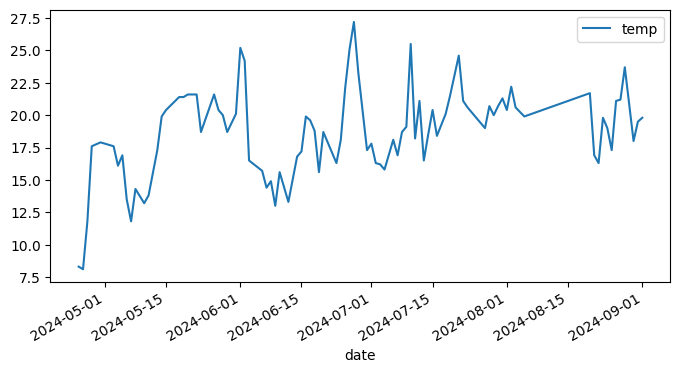

In [118]:

df.plot(kind='line', x='date', y='temp', figsize=(8, 4))

Sen ska vi inte glömma att Pandas är helt underbart och att det vi gjort ovan också kan göras med fyra rader kod:

<Axes: xlabel='date'>

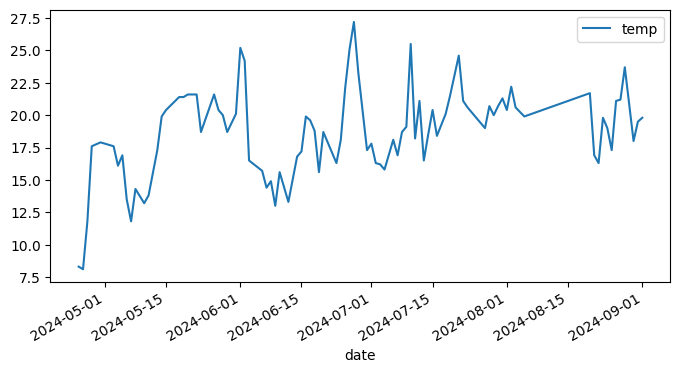

In [119]:
df2 = pd.read_json('data/temps.json')
df2['temp'] = df2.temp.str.replace(',', '.').astype(float)
df2.dropna(inplace=True)
df2.plot(kind='line', x= 'date', y='temp', figsize=(8, 4))

### Datatvätt med Pandas

Pandas kan automatiskt ändra de olika datumformaten till ett enhetligt format och göra om dem till sin egen `datetime64`-datatyp.

In [ ]:
df3 = pd.read_json('data/temps.json')
df3.date

`temp`-kolumnen är av `object`-datatypen och behöver lite hjälp att omvandlas till `float`.

In [ ]:
df3.temp

Vi kan komma åt `str`-metoder på värdena i en kolumn genom att ange `.str` efter kolumnens namn. Då kan vi köra `replace()` på `temp`-kolumnen och omvandla värdena till `float`. Pandas hanterar automatisk `None`-värden.

In [ ]:
df3.temp.str.replace(',', '.').astype(float)

Vi skriver över värdena i `temp`-kolumnen med de nya.

In [59]:
df3['temp'] = df3.temp.str.replace(',', '.').astype(float)

In [ ]:
df3.temp

Nu kan vi droppa raderna med saknade värden.

In [61]:
df3.dropna(inplace=True)


In [ ]:
df3

In [ ]:
df3.plot(kind='line', x= 'date', y='temp', figsize=(8, 4))